<a href="https://colab.research.google.com/github/M-Awwab-Khan/most-comprehensive-movies-analysis/blob/main/Movie_Metrics_An_Analyst_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

In [2]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
100% 228M/228M [00:01<00:00, 180MB/s]
100% 228M/228M [00:01<00:00, 173MB/s]


In [3]:
! unzip "the-movies-dataset.zip"

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [44]:
import numpy as np
import pandas as pd
from IPython.display import Image, HTML
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ast
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set(font_scale=0.8)
pd.set_option('display.max_colwidth', 50)
py.init_notebook_mode(connected=True)

In [5]:
df = pd.read_csv('/content/movies_metadata.csv')

In [ ]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


##Understanding the Dataset
The dataset above was obtained through the TMDB API. The movies available in this dataset are in correspondence with the movies that are listed in the MovieLens Latest Full Dataset comprising of 26 million ratings on 45,000 movies from 27,000 users. Let us have a look at the features that are available to us.

In [ ]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

###Features
**adult:** Indicates if the movie is X-Rated or Adult.

**belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.

**budget**: The budget of the movie in dollars.

**genres**: A stringified list of dictionaries that list out all the genres associated with the movie.

**homepage**: The Official Homepage of the move.

**id**: The ID of the move.

**imdb_id**: The IMDB ID of the movie.

**original_language**: The language in which the movie was originally
shot in.

**original_title**: The original title of the movie.

**overview**: A brief blurb of the movie.

**popularity**: The Popularity Score assigned by TMDB.

**poster_path**: The URL of the poster image.

**production_companies**: A stringified list of production companies involved with the making of the movie.

**production_countries**: A stringified list of countries where the movie was shot/produced in.

**release_date**: Theatrical Release Date of the movie.

**revenue**: The total revenue of the movie in dollars.

**runtime**: The runtime of the movie in minutes.

**spoken_languages**: A stringified list of spoken languages in the film.

**status**: The status of the movie (Released, To Be Released,
Announced, etc.)

**tagline**: The tagline of the movie.

**title**: The Official Title of the movie.

**video**: Indicates if there is a video present of the movie with
TMDB.

**vote_average**: The average rating of the movie.

**vote_count**: The number of votes by users, as counted by TMDB.

In [ ]:
df.shape

(45466, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). I will attempt at cleaning this dataset to a form suitable for analysis in the next section.

## Data Wrangling

The data that was originally obtained was in the form of a JSON File. This was converted manually into a CSV file that could be loaded into a Pandas DataFrame effortlessly. In other words, the dataset we have in our hands is already relatively clean.

Let us start by removing the features that are not useful to us.

In [6]:
df = df.drop(['imdb_id', 'adult'], axis=1)

In [ ]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


The original title refers to the title of the movie in the native language in which the movie was shot. As such, I will prefer using the translated, and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the original_language feature so no tangible information is lost in doing so.

In [7]:
df = df.drop('original_title', axis=1)

In [ ]:
df[df['revenue'] == 0].shape

(38052, 21)

We see that huge number of movies have 0 revenue, which doesn't make sense. However there are still 7000 movies with sensible revenue, hence we will replace these with NaN values to prevent them from disturbing the analysis.

In [8]:
df['revenue'] = df['revenue'].replace(0, np.nan)

The budget column is of object type which indicates, there might be some strange values in that column which prevents it from being converted. Similarly most of values in this column are also 0 which we will convert to NaN values to prevent them from disturbing the analysis.

In [9]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 21)

To answer certain questions from this dataset, we need to obtain two columns namely,
- return
- year

The return feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a \$200 million budget movie that earned \$100 million did better than a \$50,000 budget movie taking in \$200,000. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

In [10]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 22)

We have approximately 5000 movies with return values, which is about 11% of entire dataset. Although this may seem small, but it is enough to perform some useful analysis and extract insights.

In [11]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

## Exploratory Data Analysis

### Title and Overview Wordclouds
Are there certain words that figure more often in Movie Titles and Movie Blurbs? I suspect there are some words which are considered more potent and considered more worthy of a title. Let us find out!

In [12]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [ ]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

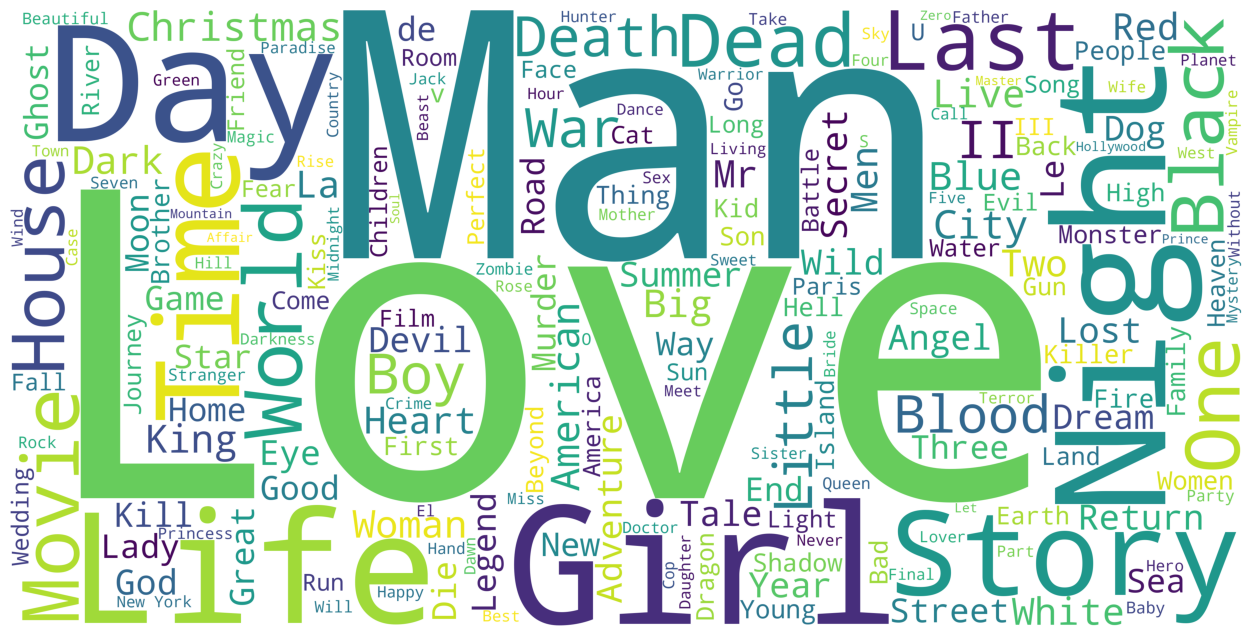

In [ ]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The word **Love** is undoubtedly the most common words across all titles, followed by Man, Life, Store, Girl, Day, Night, etc

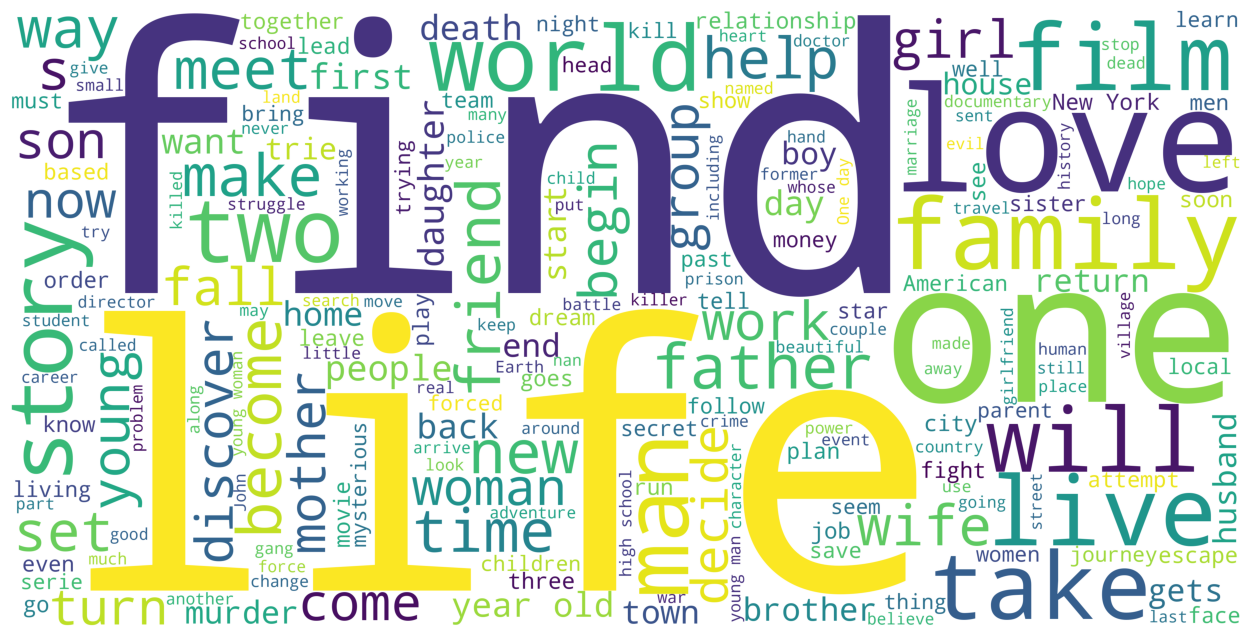

In [ ]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

The words life, family, love, one, world indicates the ubiquitous presence of romantic movies.

### Production Countries
The movies in this dataset may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmmakers, especially those in the United States of America and the United Kingdom.

In [13]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if type(x) is list else [])

Applying ast.literal_eval ensures the values in production_countries column are python interpretable, then I applied another function which in essence just extracts the name (country name) value from each dictionary of entry and returns a list which contains only the names of countries a movie is shot in.

In [ ]:
con_df = df.explode('production_countries')['production_countries']

In [ ]:
con_df = con_df.value_counts().reset_index()
con_df.columns = ['country', 'num_movies']
con_df.head()

,country,num_movies
0,United States of America,21153
1,United Kingdom,4094
2,France,3940
3,Germany,2254
4,Italy,2169


Undoubtedly US is on the top. But let's analyze countries apart from US by making a chloropleth plot.

In [ ]:
con_df = con_df[con_df['country'] != 'United States of America']

In [ ]:
import plotly.graph_objs as go

data = [
    go.Choropleth(
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            dtick = 1,
            tickprefix = '',
            title = 'Production Countries'),
      )
]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'mercator'
        )
    ),
    width=1500,
    height=800
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")


It can be seen that United Kingdom, France and Germany are also popular countries for movie makers.

### Franchise Movies

Let's now analyze the franchise movies and see how long each franchise has been running.

In [ ]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if type(x) == dict else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [ ]:
df_fran.shape

(4491, 23)

In [ ]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

,belongs_to_collection,count,mean,sum
0,... Has Fallen Collection,2,183390043.5,366780087.0
1,00 Schneider Filmreihe,0,NaN,0.0
2,08/15 Collection,0,NaN,0.0
3,100 Girls Collection,0,NaN,0.0
4,101 Dalmatians (Animated) Collection,1,215880014.0,215880014.0
...,...,...,...,...
1690,Сказки Чуковского,0,NaN,0.0
1691,Чебурашка и крокодил Гена,0,NaN,0.0
1692,Что Творят мужчины! (Коллекция),0,NaN,0.0
1693,男はつらいよ シリーズ,0,NaN,0.0


#### Highest Grossing Movie Franchises

In [ ]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


By sorting along the sum column we are essentially asking the question which collection of movies generated the most budget (overall). By the results it is evident that Harry potter, star wars and james bond collection are at the top with about $7 billion of revenue.

#### Most Successful Movie Franchises (by Average Gross)

By sorting along the mean column we will get insights about the success of a movie by average gross.

In [ ]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


Avatar collection is highest grossing collection with $2.7 Billion of average revenue, however it has made only 1 movie, followed by Avengers and Frozen collections. The Harry Potter franchise is still the most successful franchise with at least 5 movies.

#### Longest Running Franchises
Let's see which franchises are the oldest, probably filming alot of movies. To do that we will sort the fran_df by 'count' column.

In [ ]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


James Bond movies are the oldest with over 26 movies. The first movie was released in 1962 and the most recent one in 2021.

### Production Companies

In [ ]:
df.production_companies

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45466, dtype: object

In [14]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if type(x) is list else [])

In [ ]:
com_df = df.explode('production_companies')
com_pivot = com_df.pivot_table(index='production_companies', values='revenue', aggfunc={'revenue': ['sum', 'mean', 'count']})

In [ ]:
com_pivot.columns=['Number of Movies', 'Average Revenue', 'Total Revenue']

#### Highest Earning Production Companies
Let us find out which production companies have earned the most money from the movie making business.

In [ ]:
com_pivot.sort_values('Total Revenue', ascending=False).head(10)

,Number of Movies,Average Revenue,Total Revenue
production_companies,,,
Warner Bros.,491,1.293792e+08,6.352519e+10
Universal Pictures,463,1.193503e+08,5.525919e+10
Paramount Pictures,395,1.235650e+08,4.880819e+10
Twentieth Century Fox Film Corporation,341,1.398468e+08,4.768775e+10
Walt Disney Pictures,147,2.778046e+08,4.083727e+10
Columbia Pictures,236,1.367785e+08,3.227974e+10
New Line Cinema,198,1.119868e+08,2.217339e+10
Amblin Entertainment,68,2.550547e+08,1.734372e+10
DreamWorks SKG,78,1.984071e+08,1.547575e+10


Warner Bros is the highest earning production company of all time earning a staggering 63.5 billion dollars from close to 500 movies. Universal Pictures and Paramaount Pictures are the second and the third highest earning companies with 55 billion dollars and 48 billion dollars in revenue respectively.

#### Most Successful Production Companies

Which production countries are most successful? Let's first define the success criteria. Any company with atleast 15 movies and highest average revenue will be considered most successful.

In [ ]:
com_pivot[com_pivot['Number of Movies'] >= 15].sort_values('Average Revenue', ascending=False).head(10)

,Number of Movies,Average Revenue,Total Revenue
production_companies,,,
Pixar Animation Studios,18,6.215852e+08,1.118853e+10
Marvel Studios,19,6.157703e+08,1.169964e+10
Revolution Sun Studios,15,5.413559e+08,8.120339e+09
Lucasfilm,22,4.499282e+08,9.898421e+09
DreamWorks Animation,34,4.031622e+08,1.370752e+10
DC Entertainment,16,3.882880e+08,6.212609e+09
Dentsu,18,3.807336e+08,6.853205e+09
Jerry Bruckheimer Films,24,3.732267e+08,8.957441e+09
Marvel Enterprises,19,3.441088e+08,6.538067e+09


On sorting by average revenue, It is pretty clear that Pixar Animation Studios and Marvel Studios are at the top. Another thing to note, these results are entirely different from the highest earning production companies.

### Original Language


In [ ]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number of movies', 'language']
lang_df.head()

,number of movies,language
original_language,,
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


From production countries, we already knew that most of our movies are english, which is evident from this. However apart from english, other common languages are french, italian, japanese, german. Let's visualize it.

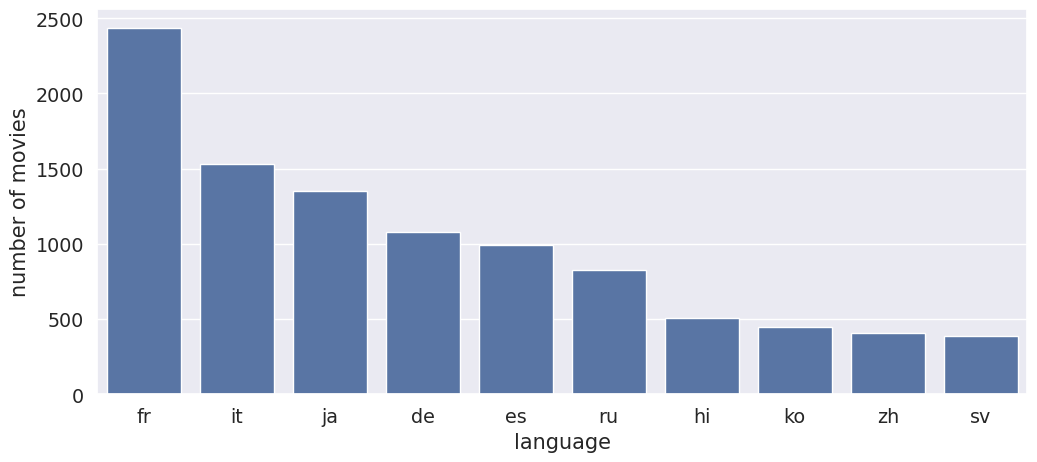

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number of movies', data=lang_df.iloc[1:11])
plt.show()

After german, spanish, russian and hindi are common.

### Popularity and Votes

In [15]:
df.popularity = pd.to_numeric(df.popularity, errors='coerce')

Let's now examine the descriptive statistics of popularity, vote_count and vote_average columns.

In [ ]:
df.popularity.describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

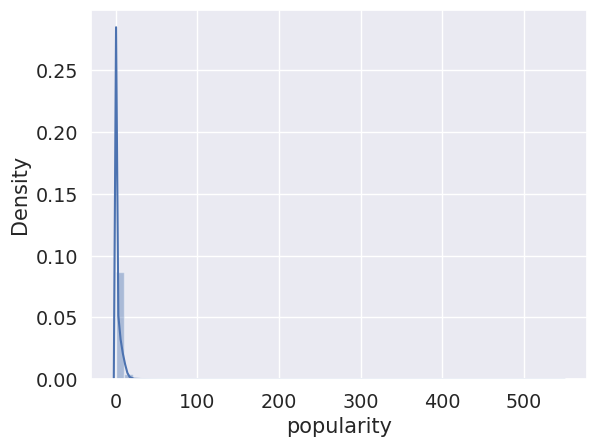

In [ ]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

<Axes: ylabel='Frequency'>

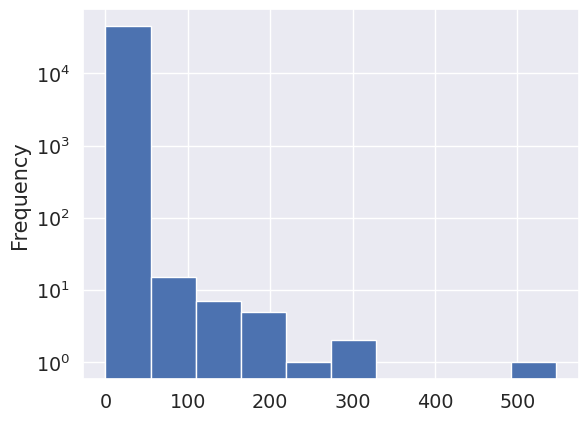

In [ ]:
df['popularity'].plot(logy=True, kind='hist')

Its better to use log transformation on count as some values are way far than mean and data seems to be highly skewed.

The Popularity score seems to be an extremely skewed quentity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

In [ ]:
df.popularity.median()

1.127685

So let's see which movies tends to skew the dataframe.

In [ ]:
df[['title', 'popularity', 'vote_average', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,vote_average,year
30700,Minions,547.488298,6.4,2015.0
33356,Wonder Woman,294.337037,7.2,2017.0
42222,Beauty and the Beast,287.253654,6.8,2017.0
43644,Baby Driver,228.032744,7.2,2017.0
24455,Big Hero 6,213.849907,7.8,2014.0
26564,Deadpool,187.860492,7.4,2016.0
26566,Guardians of the Galaxy Vol. 2,185.330992,7.6,2017.0
14551,Avatar,185.070892,7.2,2009.0
24351,John Wick,183.870374,7.0,2014.0
23675,Gone Girl,154.801009,7.9,2014.0


Minions is the most popular movie by the TMDB Popularity Score. Wonder Woman and Beauty and the Beast, two extremely successful woman centric movies come in second and third respectively.

#### Most Voted Movies

In [ ]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

Just like the poplularity column, vote_count is also extremely skewed with values upto 14075, while the 75th percentile is only 34.

In [ ]:
df[['title', 'popularity', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,popularity,vote_count,year
15480,Inception,29.108149,14075.0,2010.0
12481,The Dark Knight,123.167259,12269.0,2008.0
14551,Avatar,185.070892,12114.0,2009.0
17818,The Avengers,89.887648,12000.0,2012.0
26564,Deadpool,187.860492,11444.0,2016.0
22879,Interstellar,32.213481,11187.0,2014.0
20051,Django Unchained,19.785025,10297.0,2012.0
23753,Guardians of the Galaxy,53.291601,10014.0,2014.0
2843,Fight Club,63.869599,9678.0,1999.0
18244,The Hunger Games,20.031667,9634.0,2012.0


These are indeed the most popular movies. Both Inception and the Dark Knight are directed by Christopher Nolan including Interstellar.

In [16]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

<Axes: xlabel='vote_average', ylabel='Density'>

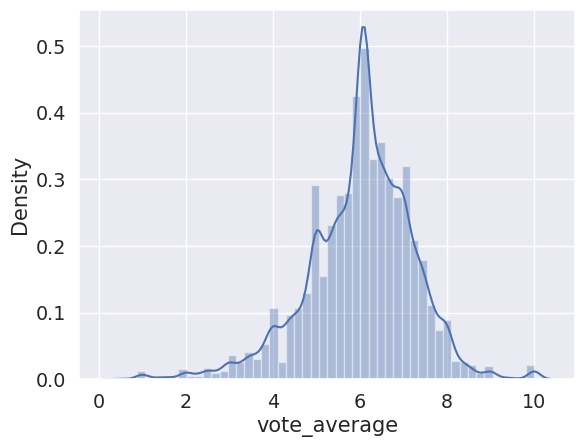

In [ ]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

The data seems to be normal as most of the values are jumping around 6. The users seem to be very strict or probably the platform. Now let's check which movies have got the highest average vote count by sorting vote_count in descending order. But that wouldn't be enough. Do you know why? Well it turns out there may be some movies which have only very few high ratings which will move their mean very close to 10, which is unfair as those ratings are not representative of the whole population. Therefore we will apply this technique to only those movies where vote_count is atleast 2500.

In [ ]:
df[df['vote_count'] >= 2500][['title', 'vote_count', 'year', 'vote_average']].sort_values(['vote_average', 'vote_count'], ascending=False).head(10)

,title,vote_count,year,vote_average
314,The Shawshank Redemption,8358.0,1994.0,8.5
834,The Godfather,6024.0,1972.0,8.5
12481,The Dark Knight,12269.0,2008.0,8.3
2843,Fight Club,9678.0,1999.0,8.3
292,Pulp Fiction,8670.0,1994.0,8.3
522,Schindler's List,4436.0,1993.0,8.3
23673,Whiplash,4376.0,2014.0,8.3
5481,Spirited Away,3968.0,2001.0,8.3
2211,Life Is Beautiful,3643.0,1997.0,8.3
1178,The Godfather: Part II,3418.0,1974.0,8.3


The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.5 TMDB Scores.

#### Popularity and Vote_Average
Is there any relationship between popularity and vote_average. Let's check that.

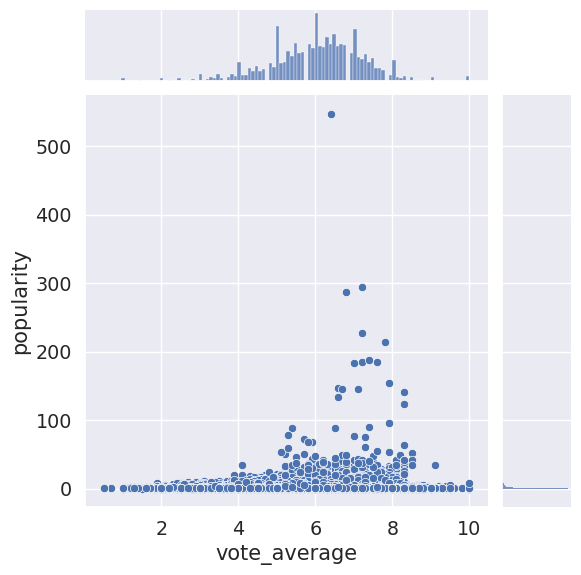

In [ ]:
sns.jointplot(x='vote_average', y='popularity', data=df)

0.097 pretty low. In other words, popularity and vote average and independent quantities. It would be interesting to discover how TMDB assigns numerical popularity scores to its movies.

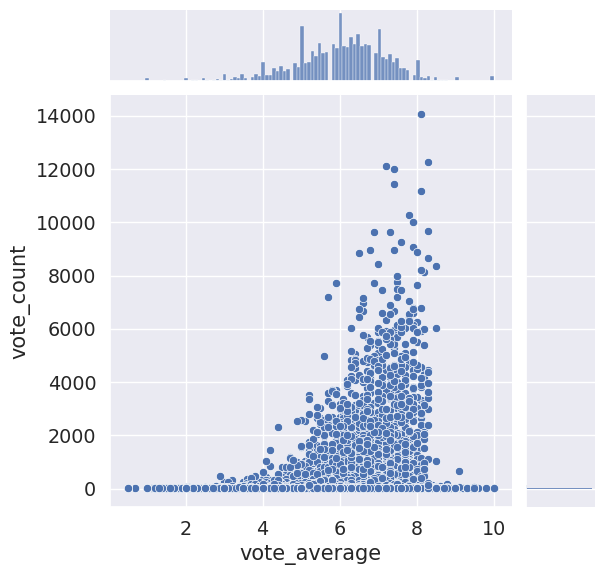

In [ ]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

There doesn't seem to be any tangible relation between the two quantities, which we can confirm by looking at the correlation heatmap. However popularity and vote-count seems to be strongly correlated.

<Axes: >

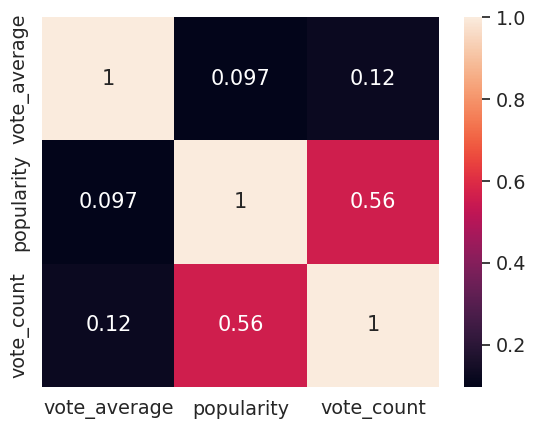

In [ ]:
sns.heatmap(df[['vote_average', 'popularity', 'vote_count']].corr(), annot=True)

### Release Dates
Release date can be a cruicial factor in determining a movie's success. In this section, I will try to uncover the relation between release dates and movie success.

In [17]:
df.release_date = pd.to_datetime(df.release_date, errors='coerce')

In [18]:
df['month'] = df.release_date.dt.month_name()

In [19]:
df['day'] = df.release_date.dt.day_name()

<Axes: title={'center': 'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

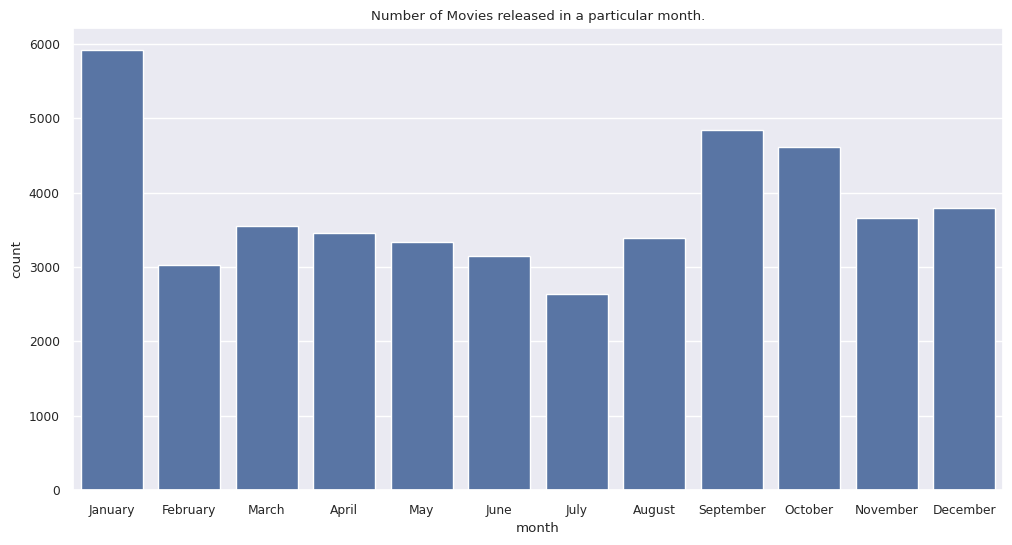

In [20]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x='month', data=df, order=months)

There seems to exist a tangible pattern in movie releases. A lot of movies are released in the beginning of the year and in September, the beginning of Winter Season.

In which months do bockbuster movies tend to release? To answer this question, we will consider all movies that have made in excess of 100 million dollars and calculate the average gross for each month.

<Axes: xlabel='month'>

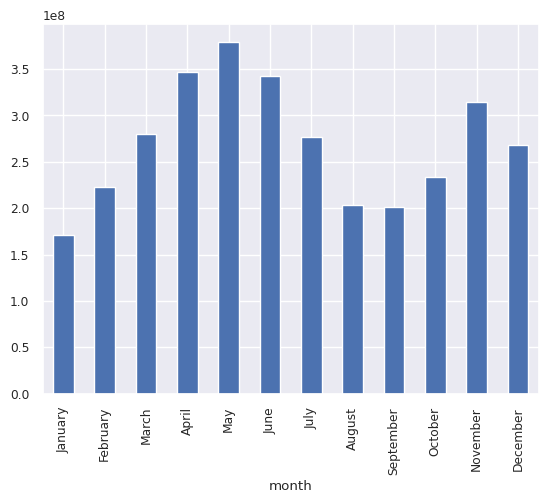

In [ ]:
df[df['revenue'] > 1e8].groupby('month')['revenue'].mean().loc[months].plot(kind='bar')

We see that the months of April, May and June have the highest average gross among high grossing movies. This can be attributed to the fact that blockbuster movies are usually released in the summer when the kids are out of school and the parents are on vacation and therefore, the audience is more likely to spend their disposable income on entertainment.

Do some months tend to be more successful than others? Let us visualise the boxplot between the return and the months.

(0.0, 12.0)

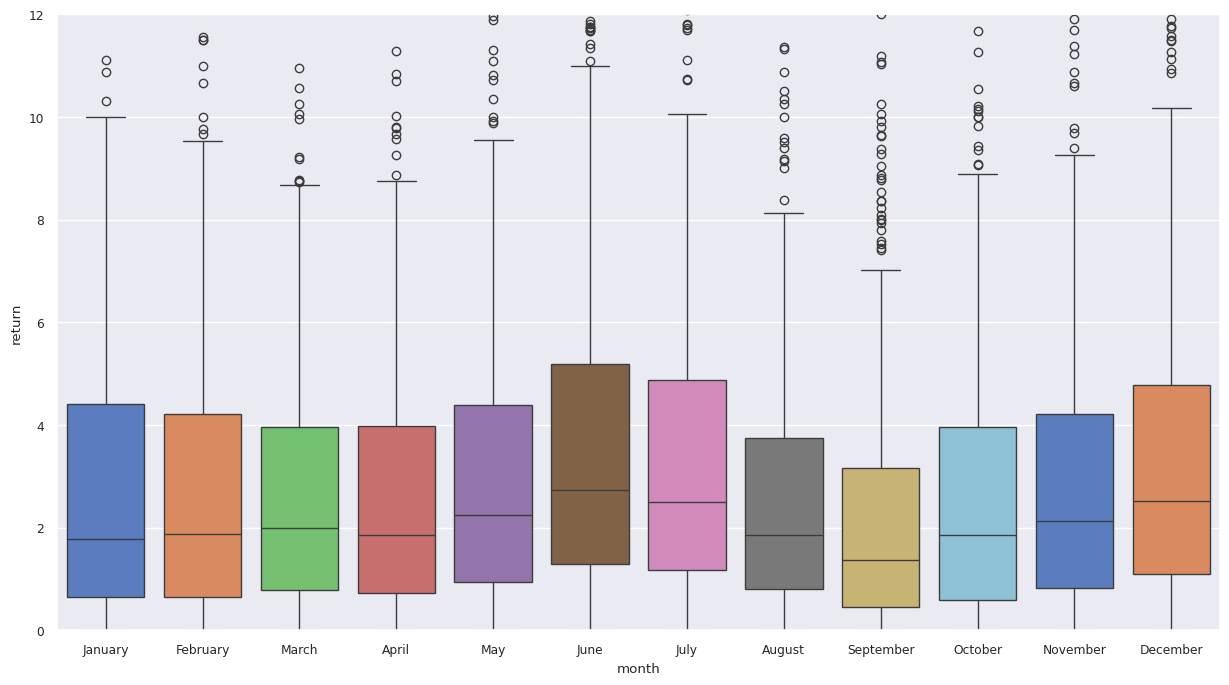

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=months)
ax.set_ylim([0, 12])

The months of June and July tend to yield the highest median returns. September is the least successful months on the metrics. September usually denotes the beginning of the school/college semester and hence a slight reduction in the consumption of movies.

Let us now have a look at the most popular days as we did for months.

<Axes: title={'center': 'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

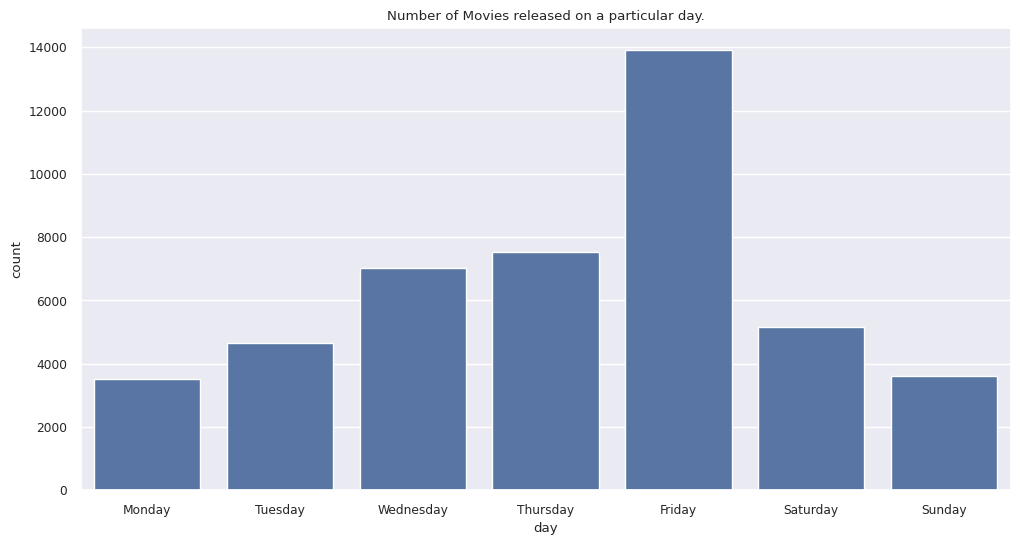

In [21]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released on a particular day.")
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='day', data=df, order=days)

Friday is clearly the most popular day for movie releases. This is understandable considering the fact that it usually denotes the beginning of the weekend. Sunday and Monday are the least popular days and this can be attributed to the same aforementioned reason.

#### Number of movies by the year
Let's take a look at the number of movies released by year

<Axes: xlabel='year'>

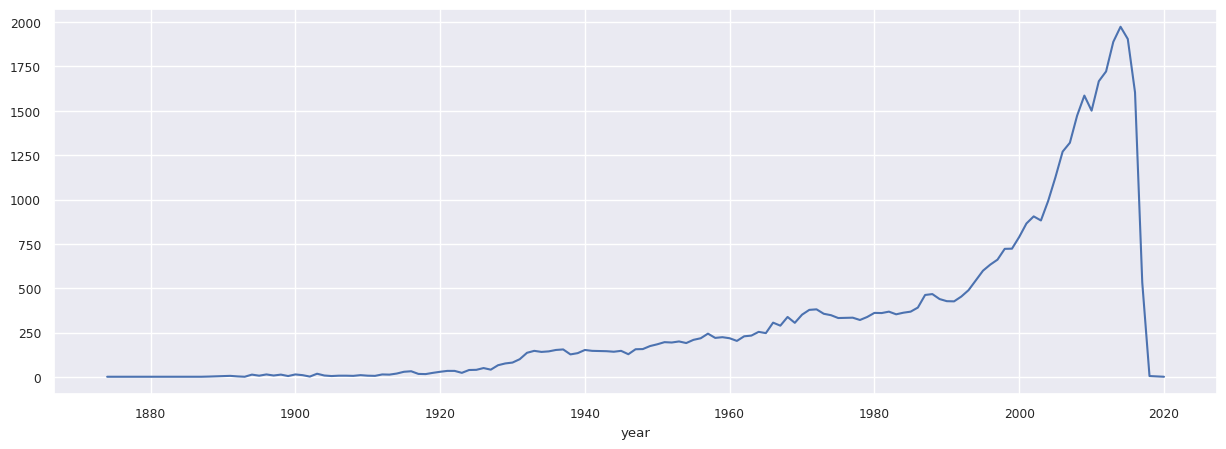

In [ ]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(15,5))
year_count.plot()

We notice that there is a sharp rise in the number of movies starting the 1990s decade.
Next, let us take a look at the earliest movies represented in the dataset.

#### Earliest Movies Represented

In [ ]:
df[['title', 'year']].sort_values('year').head(10)

,title,year
34940,Passage of Venus,1874.0
34937,Sallie Gardner at a Gallop,1878.0
41602,Buffalo Running,1883.0
34933,Man Walking Around a Corner,1887.0
34934,Accordion Player,1888.0
34938,Traffic Crossing Leeds Bridge,1888.0
34936,"Monkeyshines, No. 2",1890.0
34939,London's Trafalgar Square,1890.0
34935,"Monkeyshines, No. 1",1890.0
41194,Mosquinha,1890.0


Passage of Venus is a series of photographs of the transit of the planet Venus across the Sun on 9 December 1874. This is also the oldest movie on both IMDB and TMDB.

#### Movie Releases by Month and Year

Finally, in this section, let us construct a heatmap to indicate movie releases by month and year for all movies released in this century. This will give us a good idea of the hot and cold months for movie buffs.

In [ ]:
df_month_year = df[df['year'].notnull()]
df_month_year['year'] = df_month_year['year'].astype('int')
df_month_year = df_month_year[df_month_year['year'] >= 2000]

In [ ]:
month_year_pivot = pd.pivot_table(data=df_month_year, index ='month', columns='year', aggfunc='count', values='title')
month_year_pivot = month_year_pivot.fillna(0)
month_year_pivot

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020
month,,,,,,,,,,,,,,,,,,,,
April,55.0,55.0,52.0,66.0,68.0,84.0,94.0,94.0,90.0,129.0,105.0,138.0,121.0,162.0,206.0,171.0,163.0,77.0,2.0,0.0
August,63.0,68.0,55.0,80.0,63.0,69.0,92.0,97.0,124.0,110.0,104.0,102.0,148.0,144.0,174.0,157.0,115.0,18.0,0.0,0.0
December,64.0,67.0,68.0,63.0,68.0,80.0,92.0,82.0,111.0,96.0,105.0,117.0,113.0,132.0,118.0,114.0,99.0,4.0,1.0,1.0
February,52.0,48.0,55.0,53.0,69.0,58.0,69.0,92.0,111.0,124.0,107.0,107.0,100.0,124.0,134.0,141.0,133.0,72.0,0.0,0.0
January,118.0,159.0,163.0,141.0,170.0,184.0,171.0,206.0,242.0,231.0,173.0,157.0,142.0,160.0,158.0,171.0,144.0,89.0,0.0,0.0
July,40.0,40.0,47.0,46.0,52.0,68.0,66.0,71.0,93.0,75.0,81.0,103.0,90.0,122.0,112.0,125.0,107.0,33.0,0.0,0.0
June,52.0,54.0,63.0,55.0,60.0,80.0,103.0,95.0,85.0,94.0,115.0,106.0,124.0,132.0,134.0,149.0,115.0,66.0,0.0,0.0
March,62.0,67.0,71.0,61.0,69.0,86.0,112.0,94.0,96.0,113.0,95.0,134.0,163.0,160.0,165.0,157.0,143.0,93.0,1.0,0.0
May,64.0,43.0,69.0,78.0,79.0,88.0,77.0,102.0,75.0,100.0,127.0,95.0,121.0,121.0,141.0,139.0,115.0,68.0,0.0,0.0


<Axes: xlabel='year', ylabel='month'>

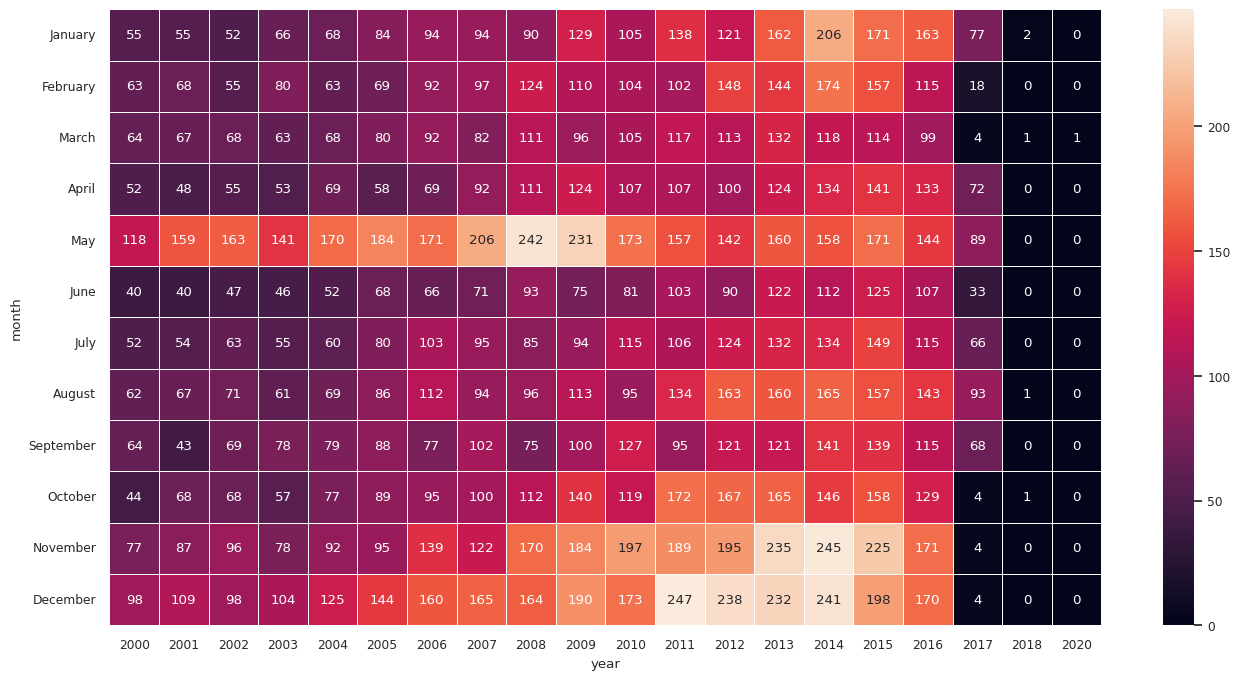

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(month_year_pivot, annot=True, linewidths=0.5, ax=ax, fmt='n', yticklabels=months)

The heatmap also supports the previous interpretations of months and years. Additionally May has always been the month of great movies. Between 2006 and 2016 a lot of movie releases peaked while it died in subsequent years because of insufficient data we have.

### Movie Status

In [ ]:
df['status'].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

Almost every movie is indeed released. However, it is interesting to see that MovieLens has user ratings for movies that are still in the planning, production and post production stage. We might take this information into account while building our collaborative filtering recommendation engine.

In [22]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [ ]:
df['spoken_languages'].value_counts()

spoken_languages
1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
10        1
12        1
19        1
13        1
Name: count, dtype: int64

Most movies have just one language spoken in the entire duration of the film. 19 is the higest number of languages spoken in a film. Let us take a look at all the films with more than 10 spoken languages.

In [ ]:
df[df['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004.0,19
35288,The Testaments,2000.0,13
14093,To Each His Own Cinema,2007.0,12
8789,The Adventures of Picasso,1978.0,10


The movie with the most number of languages, Visions of Europe is actually a collection of 25 short films by 25 different European directors. This explains the sheer diversity of the movie in terms of language.


KeyboardInterrupt: 

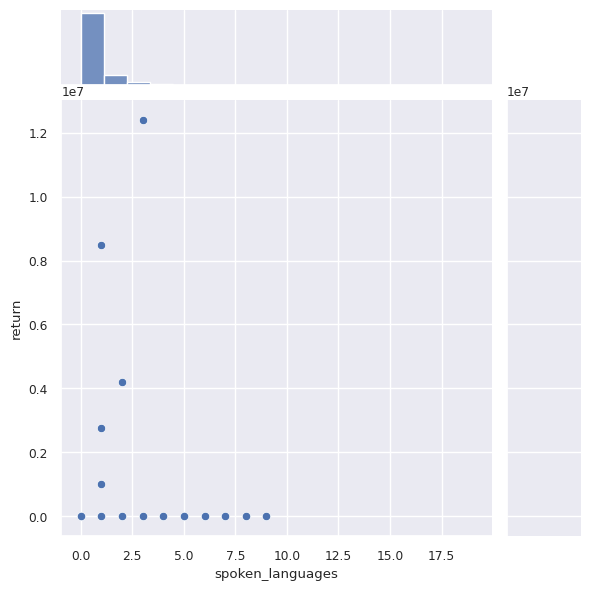

In [25]:
sns.jointplot(x="spoken_languages", y="return", data=df)

The Spearman Coefficient is 0.018 indicating no correlation between the two quantities.

### Runtime

In [26]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

The average length of a movie is about 1 hour and 30 minutes. The longest movie on record in this dataset is a staggering 1256 minutes (or 20 hours) long.

In [27]:
df['runtime'] = df['runtime'].astype('float')

We are aware that most movies are less than 5 hours (or 300 minutes) long. Let us plot a distribution of these mainstream movies.

<Axes: xlabel='runtime', ylabel='Density'>

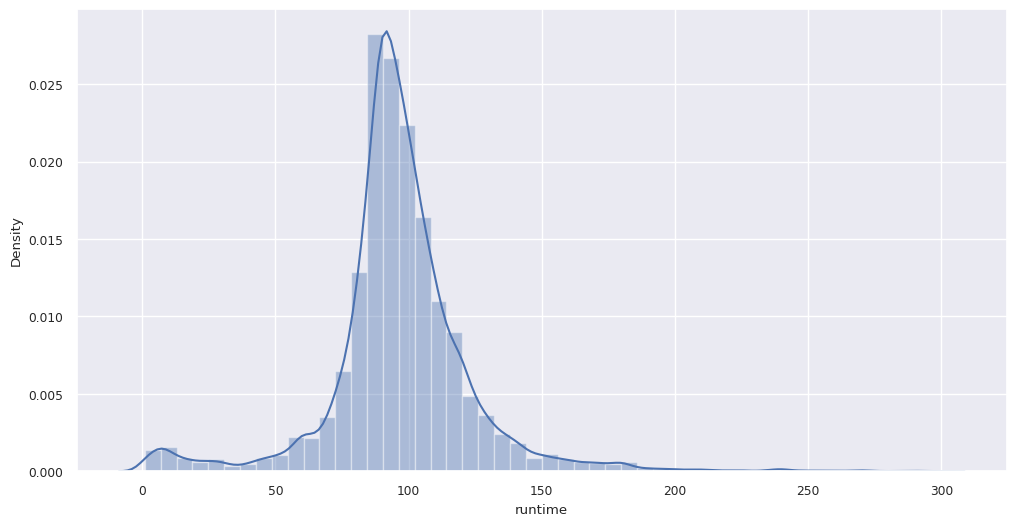

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

Is there any meaningful relationship between runtime and return? Let us find out!

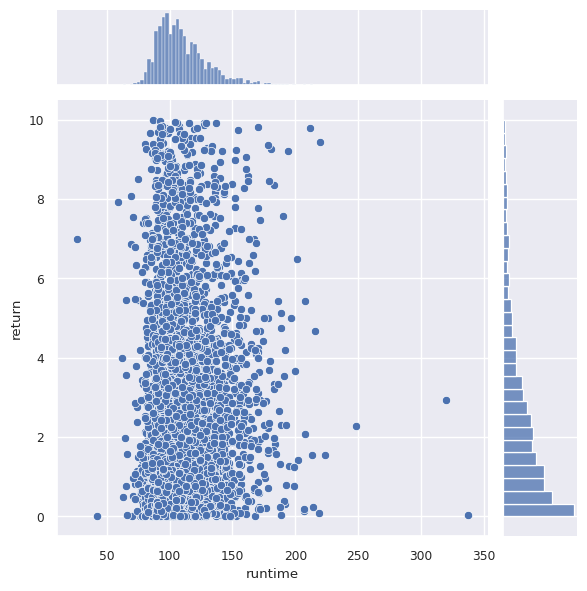

In [29]:
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot(x=df_mat['runtime'], y = df_mat['return'])
plt.show()

There seems to be no relationship between the two quantities. The duration of a movie is independent of its success. However, I have a feeling this might not be the case with duration and budget. A longer movie should entail a higher budget. Let us find out if this is really the case.

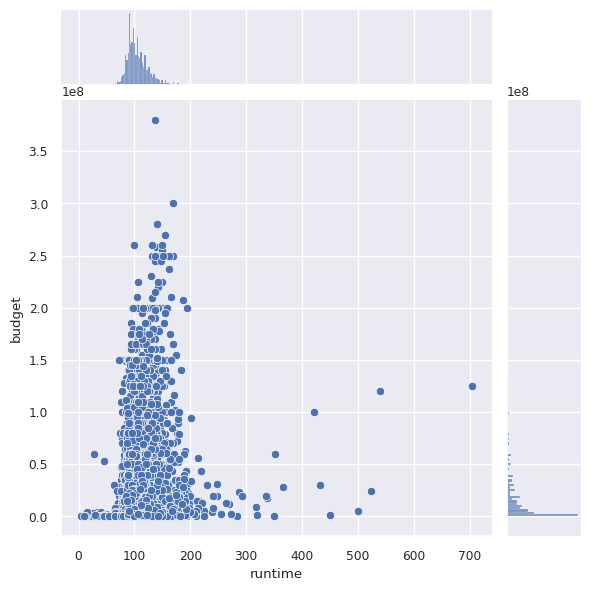

In [30]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot(y='budget', x='runtime', data=df_mat)
plt.show()

The two quantities have a much weaker correlation than I had expected. Next, I'd like to see the average lengths of movies through time, right from the 1890s to the 2017s. It would be interesting to see the trends in what filmmakers adjudged would be the appropriate length of a movie at that time.

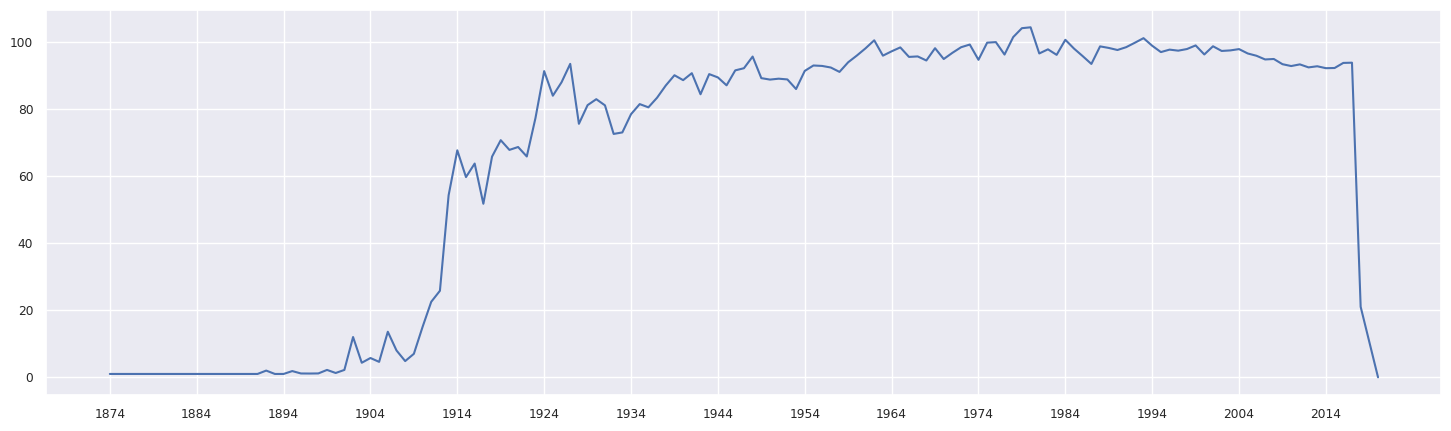

In [31]:
plt.figure(figsize=(18,5))
year_runtime = df[df['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

We notice that films started hitting the 60 minute mark as early as 1914. Starting 1924, films started having the traiditonal 90 minute duration and has remained more or less constant ever since.

Finally in this section, let us see the longest and the shortest movies of all time (with respect to the movies in the dataset).

In [32]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
35146,1.0,La Vague,1891.0
36577,1.0,Champs de Mars,1900.0
36576,1.0,Palace of Electricity,1900.0
44965,1.0,"Luis Martinetti, Contortionist",1894.0
42357,1.0,A Gathering of Cats,2007.0
36575,1.0,Eiffel Tower from Trocadero Palace,1900.0
36574,1.0,Panorama of Eiffel Tower,1900.0
44714,1.0,The Infernal Caldron,1903.0
19244,1.0,The Kiss,1896.0
44646,1.0,The Vanishing Lady,1896.0


We see that every movie in this list except A Gathering of Cats were filmed in the late 1890s and the beginning of the 20th century. All these movies were one minute long.

In [33]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978.0
40938,1140.0,Baseball,1994.0
19965,1140.0,Jazz,2001.0
13767,931.0,Berlin Alexanderplatz,1980.0
13953,925.0,Heimat: A Chronicle of Germany,1984.0
27855,900.0,The Story of Film: An Odyssey,2011.0
26682,877.0,Taken,2002.0
19158,874.0,The War,2007.0
34667,840.0,The Roosevelts: An Intimate History,2014.0
34732,840.0,Seventeen Moments in Spring,1973.0


We notice that almost all the entries in the above chart are actually miniseries and hence, do not count as feature length films. We cannot gather too much insight from this list of longest movies as there is no way of distinguishing feature length films from TV Mini Series from our dataset (except, of course, by doing it manually).

### Budget
Let us now turn our attention to budget. We expect budgets to be a skewed quantity and also heavily influenced by inflation. Nevertheless, it would be interesting to gather as much insights as possible from this quantity as budget is often a critical feature in predicting movie revenue and success. As a start, let us gather the summary statistics for our budget.

In [34]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

<Axes: xlabel='budget', ylabel='Density'>

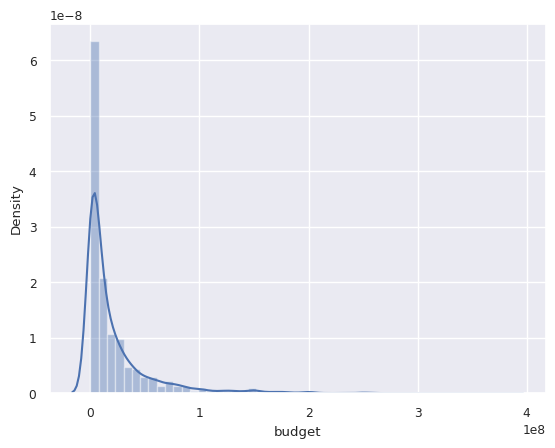

In [35]:
sns.distplot(df[df['budget'].notnull()]['budget'])

#### Most Expensive Movies of all Time


In [36]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011.0
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007.0
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015.0
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006.0
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017.0
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010.0
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012.0
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007.0
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013.0
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013.0


Two Pirates of the Carribean films occupy the top spots in this list with a staggering budget of over 300 million dollars. All the top 10 most expensive films made a profit on their investment except for The Lone Ranger which managed to recoup less than 35% of its investment, taking in a paltry 90 million dollars on a 255 million dollar budget.

How strong a correlation does the budget hold with the revenue? A stronger correlation would directly imply more accurate forecasts.

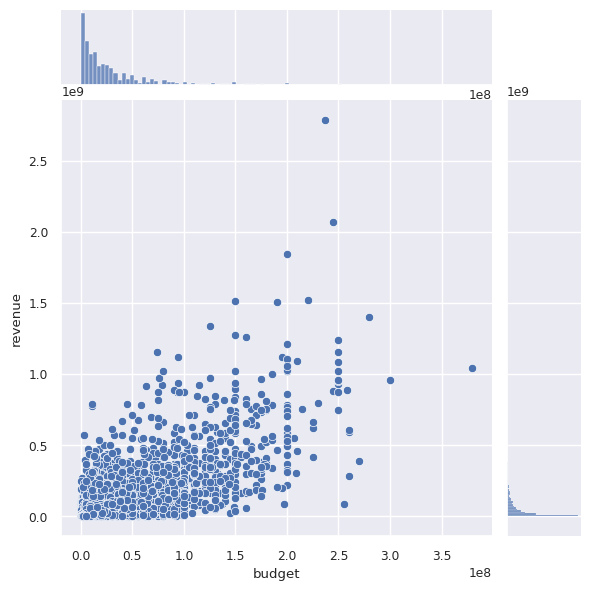

In [37]:
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()])

The pearson r value of 0.73 between the two quantities indicates a very strong correlation.
### Revenue

The final numeric feature we will explore is the revenue. The revenue is probably the most important numeric quantity associated with a movie. We will try to predict the revenue for movies given a set of features in a later section. The treatment of revenue will be very similar to that of budget and we will once again begin by studying the summary statistics.

In [38]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

The mean gross of a movie is 68.7 million dollars whereas the median gross is much lower at 16.8 million dollars, suggesting the skewed nature of revenue. The lowest revenue generated by a movie is just 1 dollar whereas the highest grossing movie of all time has raked in an astonishing *2.78 billion dollars. The best way to visualize skewness is always the distribution plot. let's see that

<Axes: xlabel='revenue', ylabel='Density'>

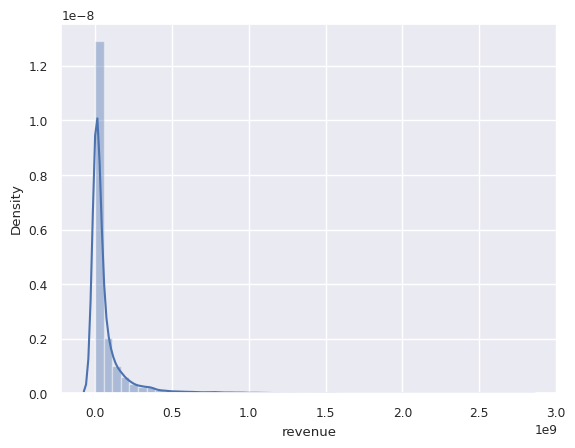

In [39]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

The distribution of revenue undergoes exponential decay just like budget. We also found that the two quantities were strongly correlated. Let us now take a look at the highest and least grossing movies of all time.

#### Highest Grossing Films of All Time

In [47]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

In [48]:
gross_top = df[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009.0
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015.0
1639,,Titanic,200000000.0,1.845034e+09,1997.0
17818,,The Avengers,220000000.0,1.519558e+09,2012.0
25084,,Jurassic World,150000000.0,1.513529e+09,2015.0
28830,,Furious 7,190000000.0,1.506249e+09,2015.0
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015.0
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011.0
22110,,Frozen,150000000.0,1.274219e+09,2013.0
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017.0


These figures have not been adjusted for inflation. Therefore, we see a disproportionate number of movies from very recent times in the top 10 list. To get an understanding of the revenue garnered by movies, let us plot the maximum revenue through the years.

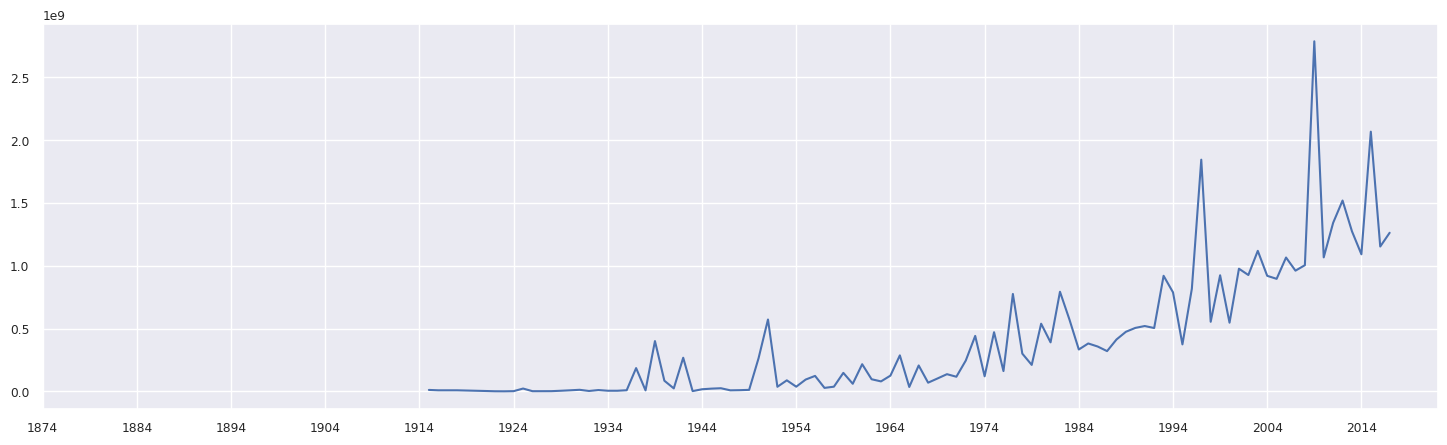

In [49]:
plt.figure(figsize=(18,5))
year_revenue = df[(df['revenue'].notnull()) & (df['year'] != 'NaT')].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

### Returns
We will not look too much into returns for the time being. Let us just check the least and the most successful movies of all time. To do this, we will only consider those movies which have a budget greater than 5 million dollars.

#### Most Successful Movies


In [50]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982.0
256,Star Wars,11000000.0,775398007.0,70.490728,1977.0
1338,Jaws,7000000.0,470654000.0,67.236286,1975.0
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973.0
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994.0
834,The Godfather,6000000.0,245066411.0,40.844402,1972.0
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989.0
24258,Annabelle,6500000.0,255273813.0,39.272894,2014.0
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987.0
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965.0


#### Worst Box Office Disasters

In [51]:
df[(df['return'].notnull()) & (df['budget'] > 5e6) & (df['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005.0
19027,5 Days of War,20000000.0,17479.0,0.000874,2011.0
21034,Special Forces,10000000.0,10759.0,0.001076,2011.0
25732,Foodfight!,65000000.0,73706.0,0.001134,2012.0
38388,Term Life,16500000.0,21256.0,0.001288,2016.0
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012.0
12038,The Good Night,15000000.0,20380.0,0.001359,2007.0
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987.0
22097,Twice Born,13000000.0,18295.0,0.001407,2012.0
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001.0


With these analyses in place, we are in a good position to construct our correlation matrix.

In [54]:
df['year'] = df['year'].replace('NaT', np.nan)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

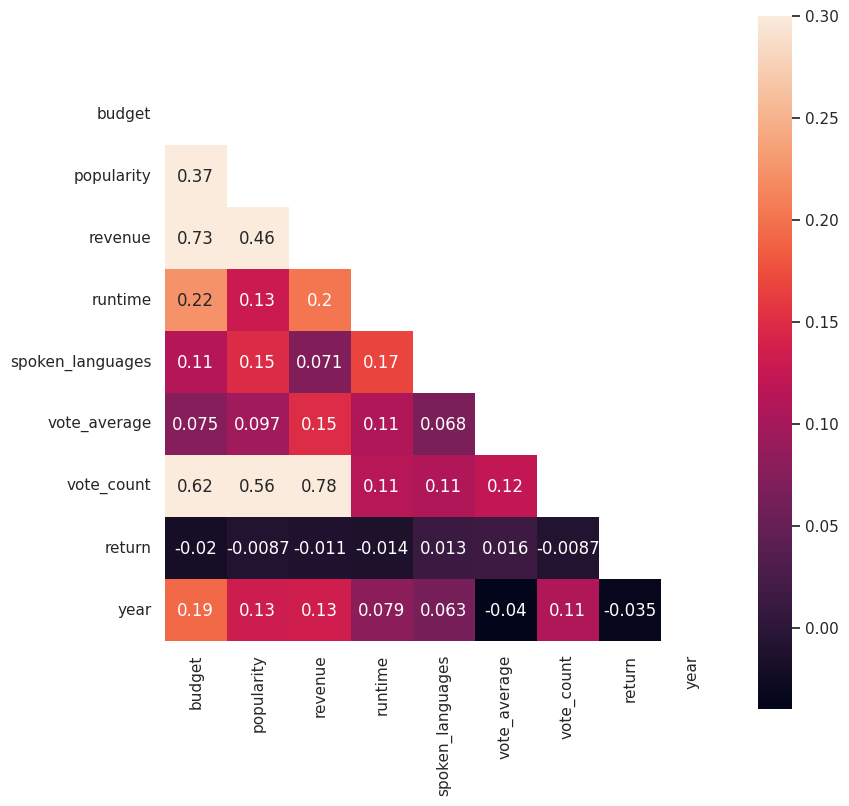

In [56]:
sns.set(font_scale=1)
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)